This project aims to use a historical dataset of movie reviews labeled negative or positive and build a machine-learning model that will predict feature tweets if they are positive or negative to avoid human interventions.

## Library and Data Imports

Import library

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load Data 

In [2]:
filePath = 'data/moviereviews.csv'
data = pd.read_csv(filePath)
data.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


Data Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
data.isnull().sum()

label      0
review    35
dtype: int64

In [6]:
data.describe().transpose()

,count,unique,top,freq
label,2000,2,neg,1000
review,1965,1939,,27


In [8]:
data = data.dropna() 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [10]:
data.isna().sum()

label     0
review    0
dtype: int64

In [17]:
data['review'].str.isspace().sum()

27

In [18]:
data = data[~data['review'].str.isspace()]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

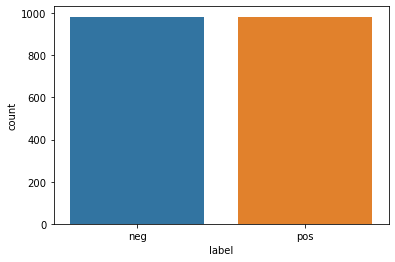

In [11]:
sns.countplot(data=data, x='label')

In [12]:
data['label'].value_counts()

neg    983
pos    982
Name: label, dtype: int64

In [20]:
data['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

In [21]:
X = data['review']
y = data['label']

# Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Training the Model

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

## Model Training

In [26]:
tfidf = TfidfVectorizer(stop_words='english')

In [28]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [29]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [30]:
nb = MultinomialNB()

In [31]:
nb.fit(X_train_tfidf,y_train)

MultinomialNB()

In [32]:
lin_svc = LinearSVC()

In [33]:
lin_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [36]:
log_model = LogisticRegression(max_iter=1000)

In [37]:
log_model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation

In [44]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [45]:
## Testing the model with a base function
def report(trained_model):
    prediction = trained_model.predict(X_test_tfidf)
    print(classification_report(y_test, prediction))
    plot_confusion_matrix(trained_model, X_test_tfidf, y_test)

              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388



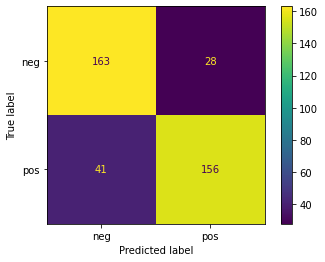

In [46]:
report(log_model)

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



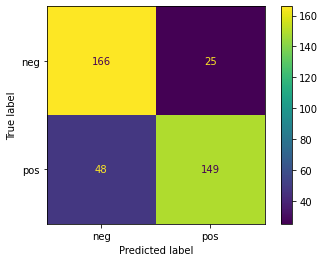

In [47]:
report(nb)

              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388



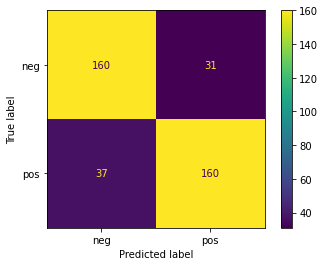

In [48]:
report(lin_svc)

## Development Pipeline

In [49]:
pipe = Pipeline([('tfidf', TfidfVectorizer()),('lin_svc', LinearSVC())]) 

In [57]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('lin_svc', LinearSVC())])

# THE END